## Introduction 
The data provided is already classified here we have to calculate the accuracy of the classification in data using the KNN algorithm

## Objective
Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
glass_data = pd.read_csv("glass.csv")
glass_data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [4]:
glass_data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
glass_data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
glass_data[glass_data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
glass_data.drop_duplicates(inplace=True)

In [10]:
glass_data[glass_data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [11]:
glass_data.reset_index(inplace=True)

In [12]:
glass_data.drop("index",axis=1,inplace=True)

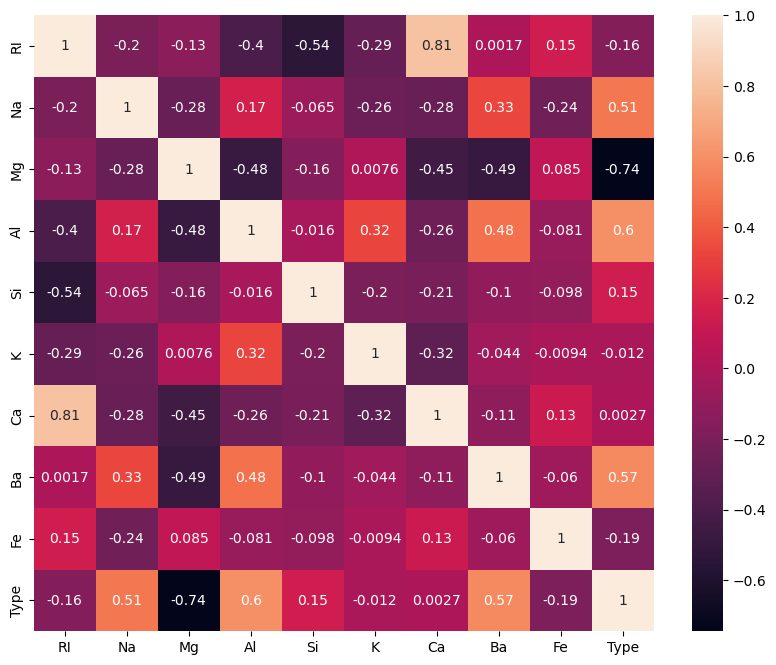

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(glass_data.corr(),annot=True)
plt.show()

## It can be seen that the correlation between 'Type' of Glass and features like 'Ca' and 'K' is very close to 0.
+ Hence, it can be seen that 'Type' of Glass seems independent of these features.
## It can also be observed that correlation between 'RI' and 'Ca' is very high
+ Hence, feature 'Ca' may be droped while making model.

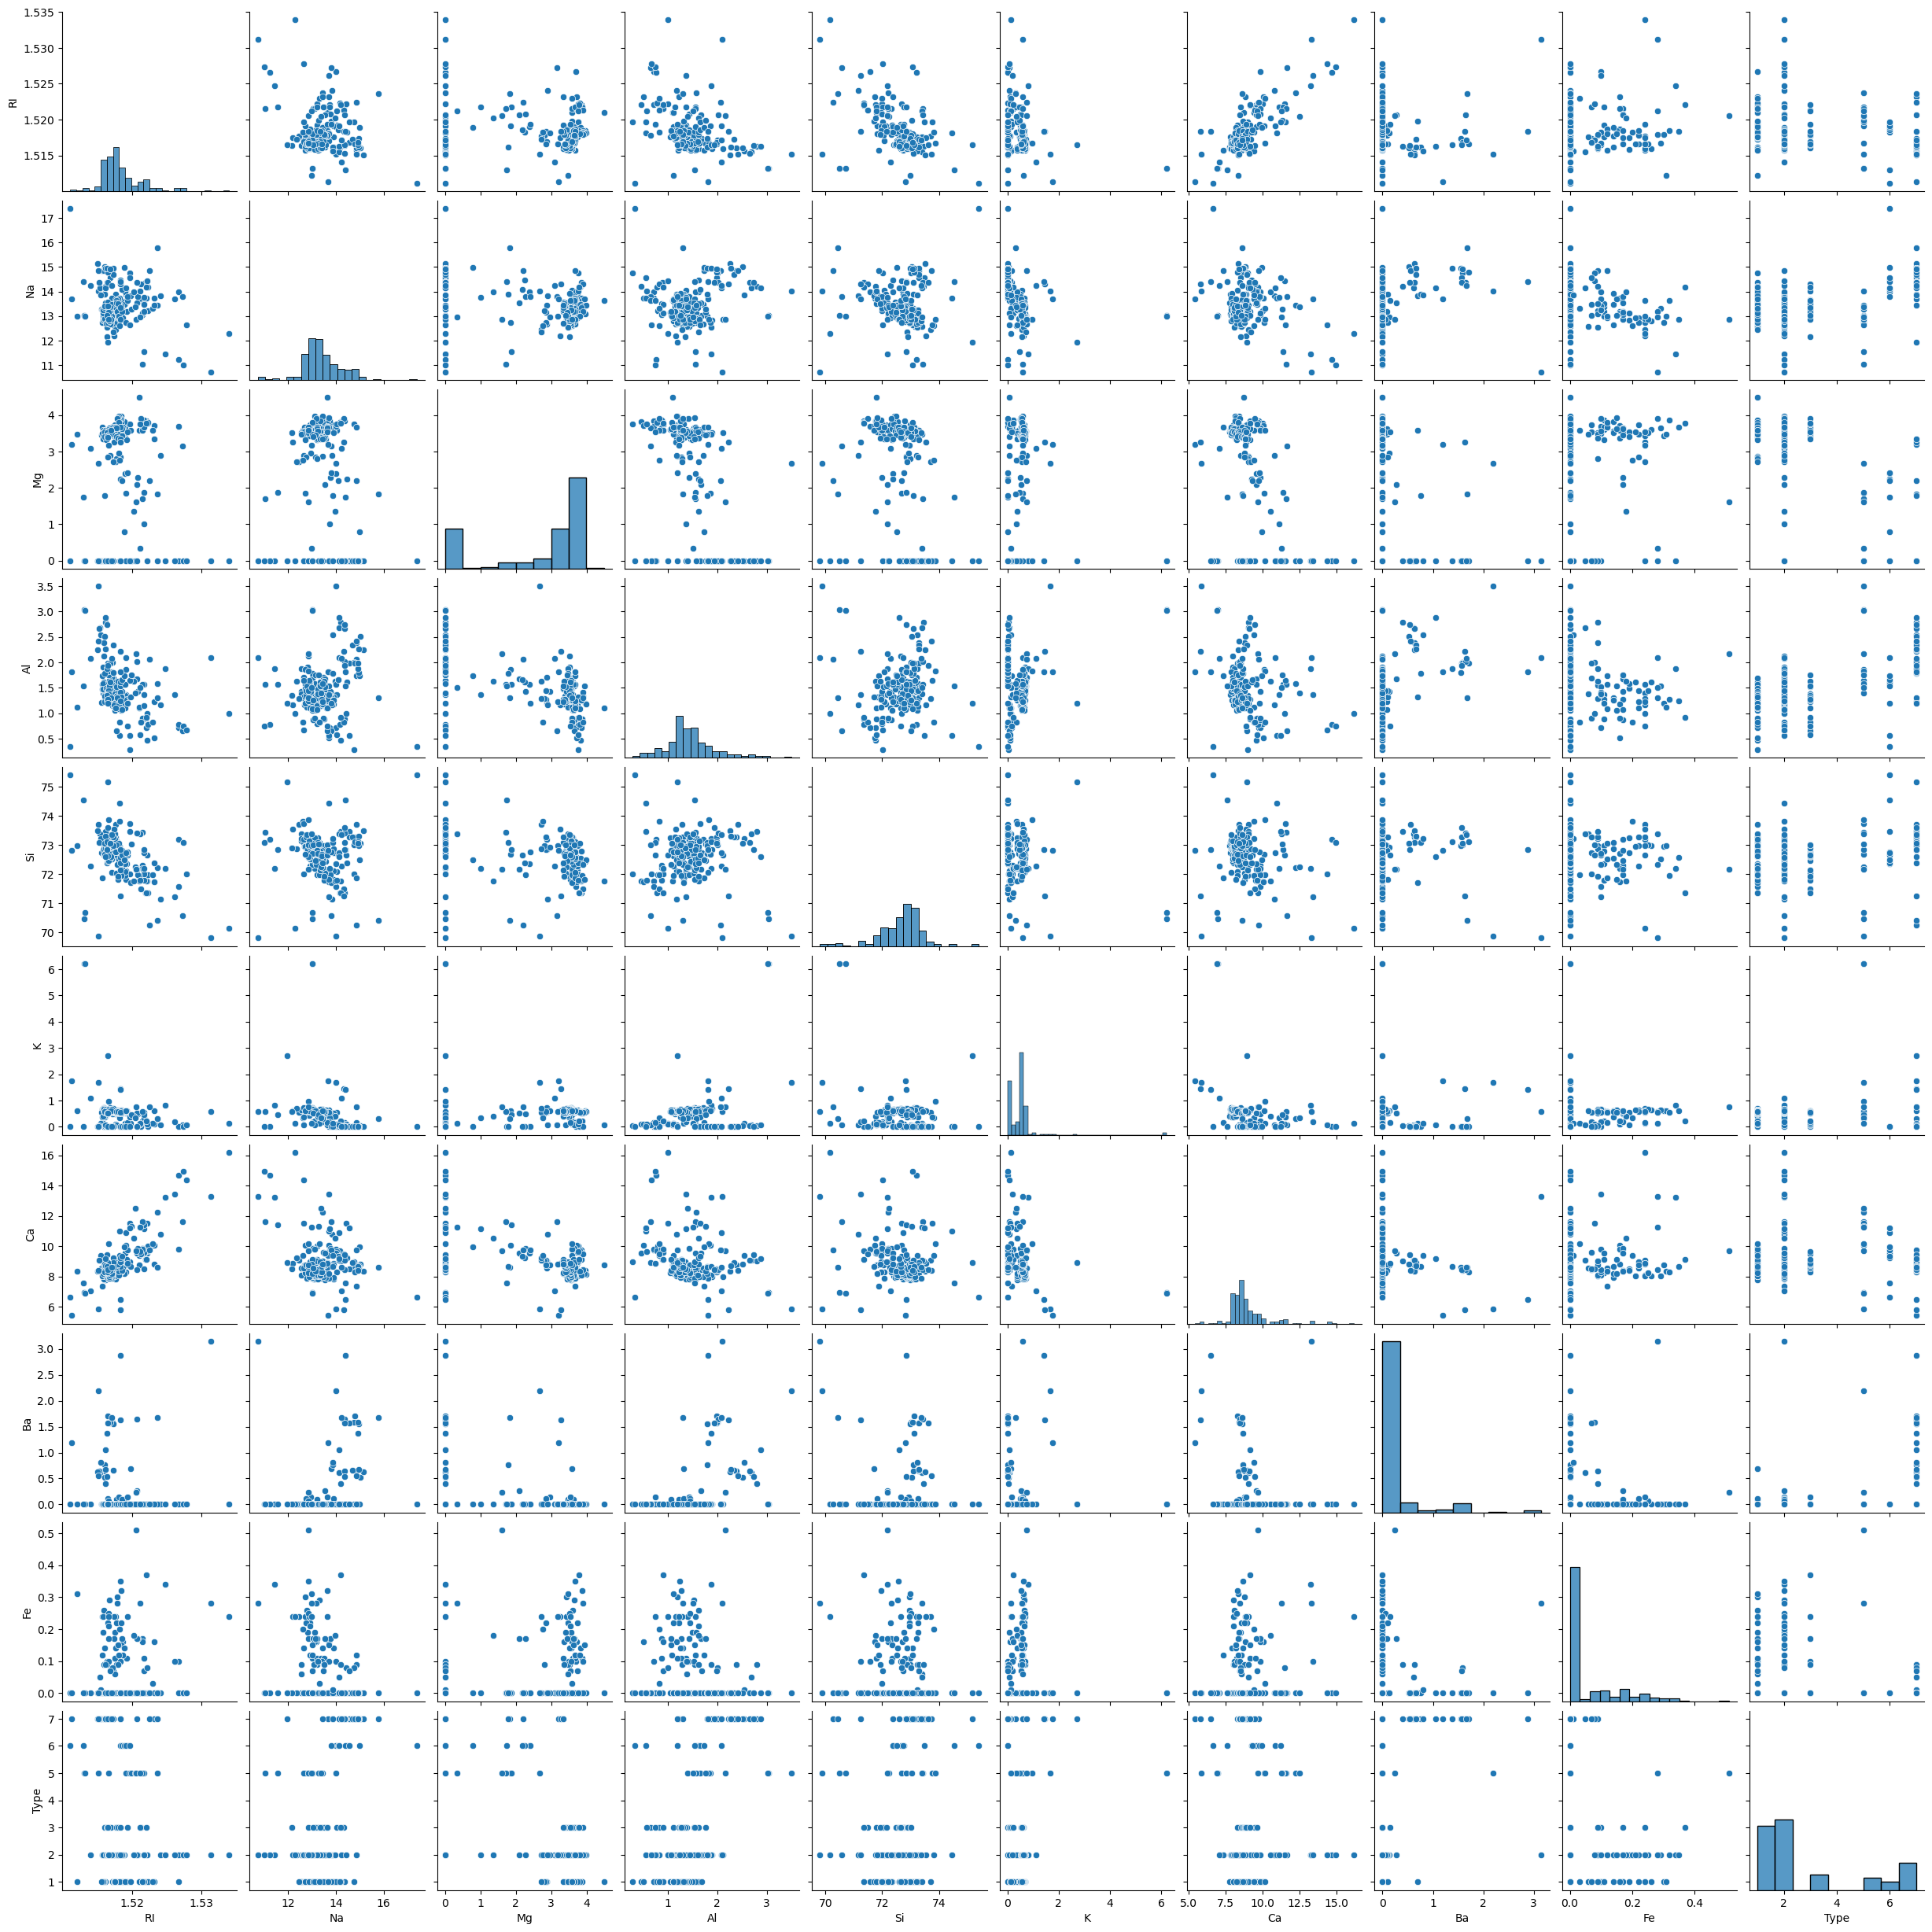

In [14]:
sns.pairplot(glass_data)
plt.show()

## Feature Scaling 

In [15]:
glass_data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [16]:
dataframe = glass_data.loc[:,['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ba', 'Fe']] 
# NOTE :- here we have dropped feature 'Ca' feature because it seems to have high correlation with feature 'RI'
dataframe.head(3)

,RI,Na,Mg,Al,Si,K,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.0,0.0


In [17]:
arr = dataframe.values
arr

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.06   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.48   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.39   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  0.     ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  0.     ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  0.     ,  1.67   ,  0.     ]])

+ Scaling all the features

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(arr)
scaled_array

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.67348013,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.02896224,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.16707322,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.76555411,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.76555411,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.76555411,
         3.00585377, -0.58830108]])

In [19]:
y = glass_data.loc[:,"Type"]
y.head(3)

0    1
1    1
2    1
Name: Type, dtype: int64

In [20]:
knn_df = pd.DataFrame(scaled_array,columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ba', 'Fe'])
knn_df.head(3)

,RI,Na,Mg,Al,Si,K,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.353808,-0.588301


In [21]:
folds_num = 10
kfolds = KFold(n_splits=10)

## Using Gridsearch Algorithm to determine most suitable number of neighbours

In [22]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [23]:
model = KNeighborsClassifier()
grid = GridSearchCV(model,param_grid = param_grid)
grid.fit(scaled_array,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [24]:
grid.best_score_

0.6623477297895903

In [25]:
grid.best_params_

{'n_neighbors': 4}

## Visualize the Grid search cv results 

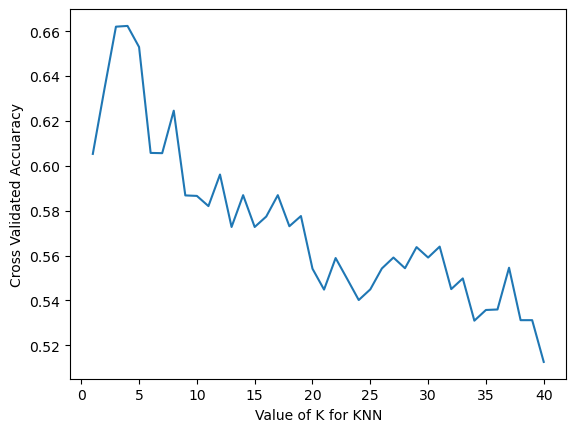

In [26]:
k_range = range(1,41)
k_score = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  score = cross_val_score(knn,scaled_array,y,cv=5)
  k_score.append(score.mean())
plt.plot(k_range,k_score)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross Validated Accuaracy")
plt.show()

## From the above it can be deduced that k-value for the final model should be 4 

In [27]:
final_model = KNeighborsClassifier(n_neighbors = 4)
score = cross_val_score(final_model,knn_df,y)

In [28]:
print(score)

[0.55813953 0.74418605 0.60465116 0.66666667 0.73809524]


In [29]:
print(score.mean())

0.6623477297895903


## It can be seen that using the KNN algorithm the mean accuracy with which data can be classified is 66.23 %.